---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Primer semestre del 2021

---

[comment]: <> (Modificar esta sección con datos personales)

* Estudiante: **Jeremy Soto Víquez**
* Carné: **B97751**
* Grupo: **1**

# `L4` - *Problema 4 — Proceso aleatorio sinusoidal*

Un proceso estocástico está definido por:
$$X(t) = C\ cos(\Omega t + \theta)$$


donde C es una variable aleatoria gaussiana de media 5 y varianza 0.2, $\Omega$ es una variable aleatoria distribuida
uniformemente en el intervalo $[2\pi(59,1) \ \ 2\pi(60,1)]$, y $\theta$ es una variable aleatoria distribuida uniformemente
en el intervalo $[0,\frac{\pi}{2}]$. Las tres variables aleatorias son estadísticamente independientes entre sí.


---


#### a) Suponga que $\Omega$ no es una variable aleatoria, sino una constante $\omega$. Encuentre $E[X(t)]$ a partir de:

$$X(t) = cos(\omega t + \theta)$$



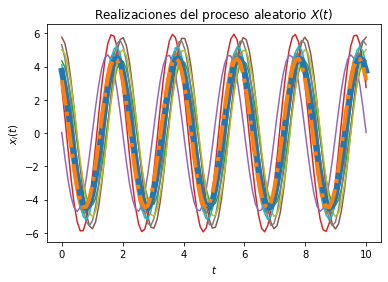

In [16]:
# Solucion parte a) 

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaA = stats.norm(5, np.sqrt(0.2))
vaZ = stats.uniform(0, np.pi/2)

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
	A = vaA.rvs()
	Z = vaZ.rvs()
	x_t = A * np.cos(np.pi*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Se definen el valores de las variables omega y theta
w = np.pi
theta = 2

# Graficar el resultado teórico del valor esperado
E = 10/np.pi * (np.cos(w*t)-np.sin(w*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final



#### b) Suponga ahora que $\Omega$ y $\theta$ son constantes, no variables aleatorias, de modo que:
$$X(t) = Ccos(\omega t+\theta)$$
#### encuentre  $R_{XX}(t, t+\tau)$

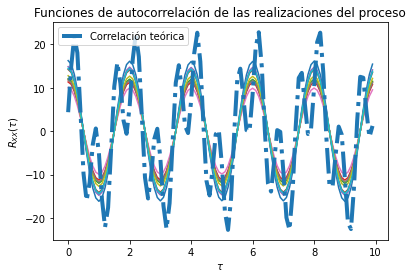

In [12]:
# Solucion parte b)

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 25.2 * np.cos(w*t+theta) * np.cos(w*(t+taus)+theta)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---